# Notebook 11 - Continuación con Redes Neuronales Multicapa.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Diseñando nuestra primera CNN

Vaya turra trabajar siempre con el mismo data set de números. ¿Verdad? Pues venga, una última vez. Rápidamente vamos a comprobar si nos aporta alguna mejora trabajar con una Red Neuronal Convolucional en cuestión de rendimiento sobre el dataset de MNIST.

---

**Tu tarea:** Diseña con Keras una Red Neuronal Convolucional y entrénalo  y evalualo con el dataset MNIST aumentado generado en el ejercicio de ayer (ya se proporciona el código para aumentar los datos). Comprueba si esta arquitectura mejora el rendimiento obtenido comparado con el la Red Neuronal Multicapa. Igualmente, compara el número de parámetros (recuerda la función ***model.summary()***) entre las dos arquitecturas.


**Importante:** Recuerda cambiar el Entorno de ejecución en la pestaña "Entorno de ejecución" >  "Cambiar tipo de entorno de ejecución" el "Acelerador por Hardware" de None a GPU, para que el rendimiento de entrenamiento sea superior.

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

import matplotlib.pyplot as plt
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils  import to_categorical

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255.0
Yt = to_categorical(Y, 10)


def traslate_imgs(X):
  
  # Matriz resultado.
  trasl_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    #r Seleccionamos cuánto vamos a cortar en X e Y.
    shift_x = np.random.randint(14) - 7
    shift_y = np.random.randint(14) - 7
    # Guardamos la traslación de la imagen.
    trasl_X[ix] = shift(x.reshape(28, 28), (shift_x, shift_y)).flatten()
    
  return trasl_X


def rotate_imgs(X):
  
  # Matriz resultado.
  rot_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    angle = np.random.randint(180) - 90
    # Guardamos la traslación de la imagen.
    rot_X[ix] = rotate(x.reshape(28, 28), angle, reshape=False).flatten()
    
  return rot_X


def noise_imgs(X, noise_level=0.5):
  
  # Matriz resultado.
  nois_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    noise = (np.random.random(x.shape) * 2.0  - 1) * noise_level
    # Guardamos la traslación de la imagen.
    nois_X[ix] = np.clip(x + noise, 0.0, 1.0).flatten()
    
  return nois_X

# Generamos train trasladada.
trasX_train = traslate_imgs(Xt)
# Generamos train rotada.
rotaX_train = rotate_imgs(Xt)
# Generamos train con ruido 50%.
no50X_train = noise_imgs(Xt, 0.5)
# Generamos train con ruido 25%.
no25X_train = noise_imgs(Xt, 0.25)

# Juntamos todos los sets.
augmX_train = np.vstack([Xt, 
                        trasX_train, 
                        rotaX_train, 
                        no50X_train, 
                        no25X_train])

# E incrementamos el vector Y por 5 veces.
augmY_train = np.tile(Yt, (5,1))

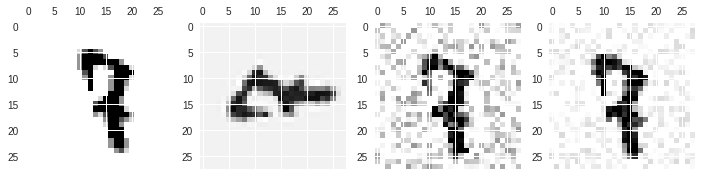

In [2]:
# Visualizamos los datos generados.
idx = 100

fig, axs = plt.subplots(1,4,figsize=(12,12))

axs[0].matshow(trasX_train[idx,:].reshape(28, 28))
axs[1].matshow(rotaX_train[idx,:].reshape(28, 28))
axs[2].matshow(no50X_train[idx,:].reshape(28, 28))
axs[3].matshow(no25X_train[idx,:].reshape(28, 28))

In [3]:
## Importamos Keras API
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(augmX_train, augmY_train, train_size=0.7)

### COMIENZA TU CÓDIGO AQUÍ ###

# Comienza la construcción del modelo Keras Sequential.
model = Sequential()

# Primera capa convolucional con ReLU-activation y max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=8, padding='same',
                 activation='relu', name='layer_conv1'))

model.add(MaxPooling2D(pool_size=2, strides=2))

# Segunda capa convolucional con ReLU-activation y max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv2'))

model.add(MaxPooling2D(pool_size=2, strides=2))

# Tercera capa convolucional con ReLU-activation y max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv3'))

model.add(MaxPooling2D(pool_size=2, strides=2))

# Aplanar la salida de 4 niveles de las capas convolucionales
# a 2-rank que se puede ingresar a una capa totalmente conectada 
model.add(Flatten())

# Primera capa completamente conectada  con ReLU-activation.
model.add(Dense(128, activation='relu'))

# Última capa totalmente conectada con activación de softmax
# para usar en la clasificación.
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(x=X_train.reshape(X_train.shape[0], 28, 28, 1), 
          y=Y_train,
          validation_data=(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test),
          epochs=20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 70000 samples, validate on 30000 samples
Epoch 1/20
70000/70000 [==============================] - 25s 360us/step - loss: 0.3858 - acc: 0.8801 - val_loss: 0.1603 - val_acc: 0.9508
Epoch 2/20
70000/70000 [==============================] - 21s 305us/step - loss: 0.1256 - acc: 0.9602 - val_loss: 0.1197 - val_acc: 0.9629
Epoch 3/20
70000/70000 [==============================] - 21s 299us/step - loss: 0.0866 - acc: 0.9726 - val_loss: 0.0906 - val_acc: 0.9718
Epoch 4/20
70000/70000 [==============================] - 21s 300us/step - loss: 0.0634 - acc: 0.9794 - val_loss: 0.0854 - val_acc: 0.9742
Epoch 5/20
70000/70000 [==============================] - 21s 304us/step - loss: 0.0501 - acc: 0.9837 - val_loss: 0.0955 - val_acc: 0.9726
Epoch 6/20
70000/70000 [==============================] - 21s 297us/step - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0907 - val_acc: 0.9744
Epoch 7/20
70000/70000 [==============================] - 21s 297us/step - loss: 0.0354 - acc: 0.9887 - val_loss: 0.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         multiple                  416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling multiple                  0         
_________________________________________________________________
layer_conv2 (Conv2D)         multiple                  14436     
_________________________________________________________________
max_pooling2d_11 (MaxPooling multiple                  0         
_________________________________________________________________
layer_conv3 (Conv2D)         multiple                  32436     
_________________________________________________________________
max_pooling2d_12 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
__________

## 2. (OPCIONAL) Clasificando imágenes reales (CIFAR100 - Dataset)

---

**Tu tarea:** 

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

import matplotlib.pyplot as plt
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split

from tensorflow.data.experimental import 